In [419]:
#import every package needed
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [420]:
#arrays to store data used in tasks
ims = []
r_channels = []
g_channels = []
b_channels = []
signal_data = []

In [421]:
def read_files():
    for i in range(5):        
        im = Image.open(str(i) + ".png") #read images
        im = im.convert('RGB')           #convert to get RGB values
        im = np.array(im)                #transform it into a numpy array
        ims.append(im)                   #store in global array

In [422]:
def task_01():
    for i in range(len(ims)):
        
        plt.subplots_adjust(hspace=.5, wspace=.5)
        fig, axs = plt.subplots(2, 2)
        fig.suptitle("Image: "+ str(i) + ".png")
        
        im = ims[i]
        
        r_channel = np.reshape(im[:,:,0],256*256)     #store different color channel values in different arrays
        g_channel = np.reshape(im[:,:,1],256*256)
        b_channel = np.reshape(im[:,:,2],256*256)

        r_channels.append(r_channel)    #store globally for other tasks
        g_channels.append(g_channel)
        b_channels.append(b_channel)
        
        plt.subplot(222)
        plt.hist(r_channel, bins=256)       #display red channel values on a histogram (256 bins for 256 possible values)
        plt.title("Red Channel Histogram")

        plt.subplot(223)
        plt.hist(g_channel, bins=256)         #display green channel values on a histogram
        plt.title("Green Channel Histogram")

        plt.subplot(224)
        plt.hist(b_channel, bins=256)        #display blue channel values on a histogram
        plt.title("Blue Channel Histogram")

        plt.subplot(221).imshow(im)

In [423]:
def task_02():
    for i in range(5):
        print("Image: "+str(i)+".png\n")
        print("Red Channel:\n")
        calculate_values(r_channels[i])
        print("\n")
        print("Green Channel:\n")
        calculate_values(g_channels[i])
        print("\n")
        print("Blue Channel:\n")
        calculate_values(b_channels[i])
        print("\n")

In [424]:
def calculate_values(values):
    r_avg = np.average(values)  #get average value of the elements of the given array parameter
    r_dev = np.std(values)      #get the deviation of the elements of the given array parameter
    r_channel_std = (values - r_avg)/r_dev  #standardise the elements (NaN can appear if r_dev = 0 )
    
    print("Expected Value: " + str(np.average(r_channel_std))) #print the expected value of the standardised array (should be 0)
    print("Deviation: " + str(np.std(r_channel_std))) #print the deviation of the standardised array (should be 1)

In [439]:
def task_03():
    for i in range(2):
        sampling_frequency, sd = wavfile.read(str(i) + '.wav')  #read wav file
        signal_data.append(sd)  #store it globally
        plot.specgram(sd, cmap = "viridis") #display it on a spectogram
        plot.show()

In [426]:
def task_04():
    for i in range(len(signal_data)):
        print("File: "+str(i)+".wav\n")
        calculate_values(signal_data[i]) #standardise the value of the wav files and check if it's good (like in task_02)
        print("\n")

In [427]:
def task_05():
    url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"
    html = urlopen(url).read() #read url data
    soup = BeautifulSoup(html, features="html.parser") #use BeautifulSoup package to work on the text

    for script in soup(["script", "style"]): #extract everything non plain text from the text (e.g. html code)
        script.extract()   

    text = soup.get_text()

    characters = list(text) #transform the text into a list of characters
    occurrencies = collections.Counter(characters) #sort the list by different characters
    plt.figure(figsize=(30,30))
    plt.figure
    plt.hist(characters, edgecolor="black", bins=len(occurrencies)) #display the text on a histogram by it's characters
    plt.show()                                                      #bin number is the number of different characters

In [428]:
read_files()

<Figure size 432x288 with 0 Axes>

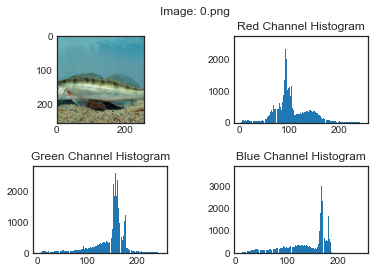

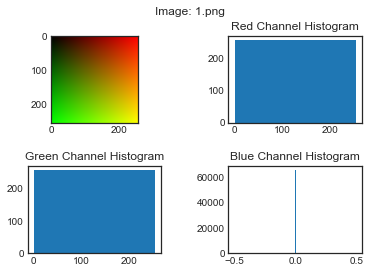

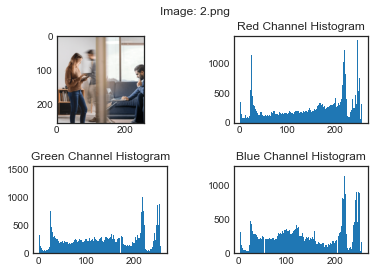

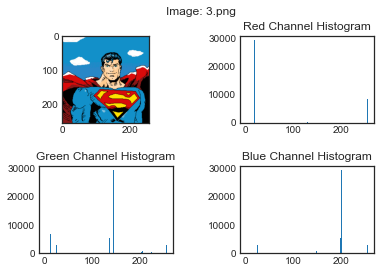

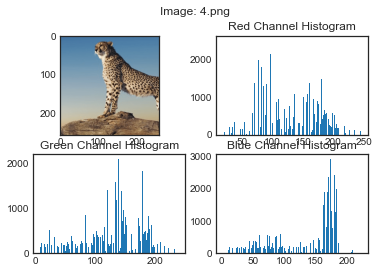

In [429]:
task_01()

In [430]:
task_02()

Image: 0.png

Red Channel:

Expected Value: -2.7755575615628914e-17
Deviation: 0.9999999999999999


Green Channel:

Expected Value: 6.938893903907228e-18
Deviation: 1.0


Blue Channel:

Expected Value: -2.7755575615628914e-17
Deviation: 1.0


Image: 1.png

Red Channel:

Expected Value: 0.0
Deviation: 1.0


Green Channel:

Expected Value: 0.0
Deviation: 1.0


Blue Channel:

Expected Value: nan
Deviation: nan


Image: 2.png

Red Channel:

Expected Value: -5.551115123125783e-17
Deviation: 1.0


Green Channel:

Expected Value: 4.163336342344337e-17
Deviation: 1.0000000000000002


Blue Channel:

Expected Value: 2.7755575615628914e-17
Deviation: 1.0


Image: 3.png

Red Channel:

Expected Value: 4.163336342344337e-17
Deviation: 0.9999999999999999


Green Channel:

Expected Value: -2.42861286636753e-17
Deviation: 1.0


Blue Channel:

Expected Value: 3.642919299551295e-17
Deviation: 1.0


Image: 4.png

Red Channel:

Expected Value: 3.469446951953614e-18
Deviation: 1.0


Green Channel:

Expected

<ipython-input-424-f4d0470a613a>:4: RuntimeWarning: invalid value encountered in true_divide
  r_channel_std = (values - r_avg)/r_dev  #standardise the elements (nan can appear if r_dev = 0 )


<ipython-input-439-16578d9801d1>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_frequency, sd = wavfile.read(str(i) + '.wav')  #read wav file


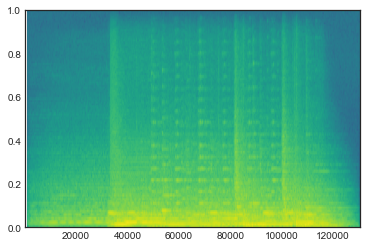

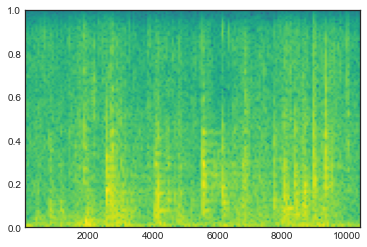

In [440]:
task_03()

In [432]:
task_04()

File: 0.wav

Expected Value: -8.46968817723452e-18
Deviation: 1.0


File: 1.wav

Expected Value: -9.696178103501487e-18
Deviation: 0.9999999999999999




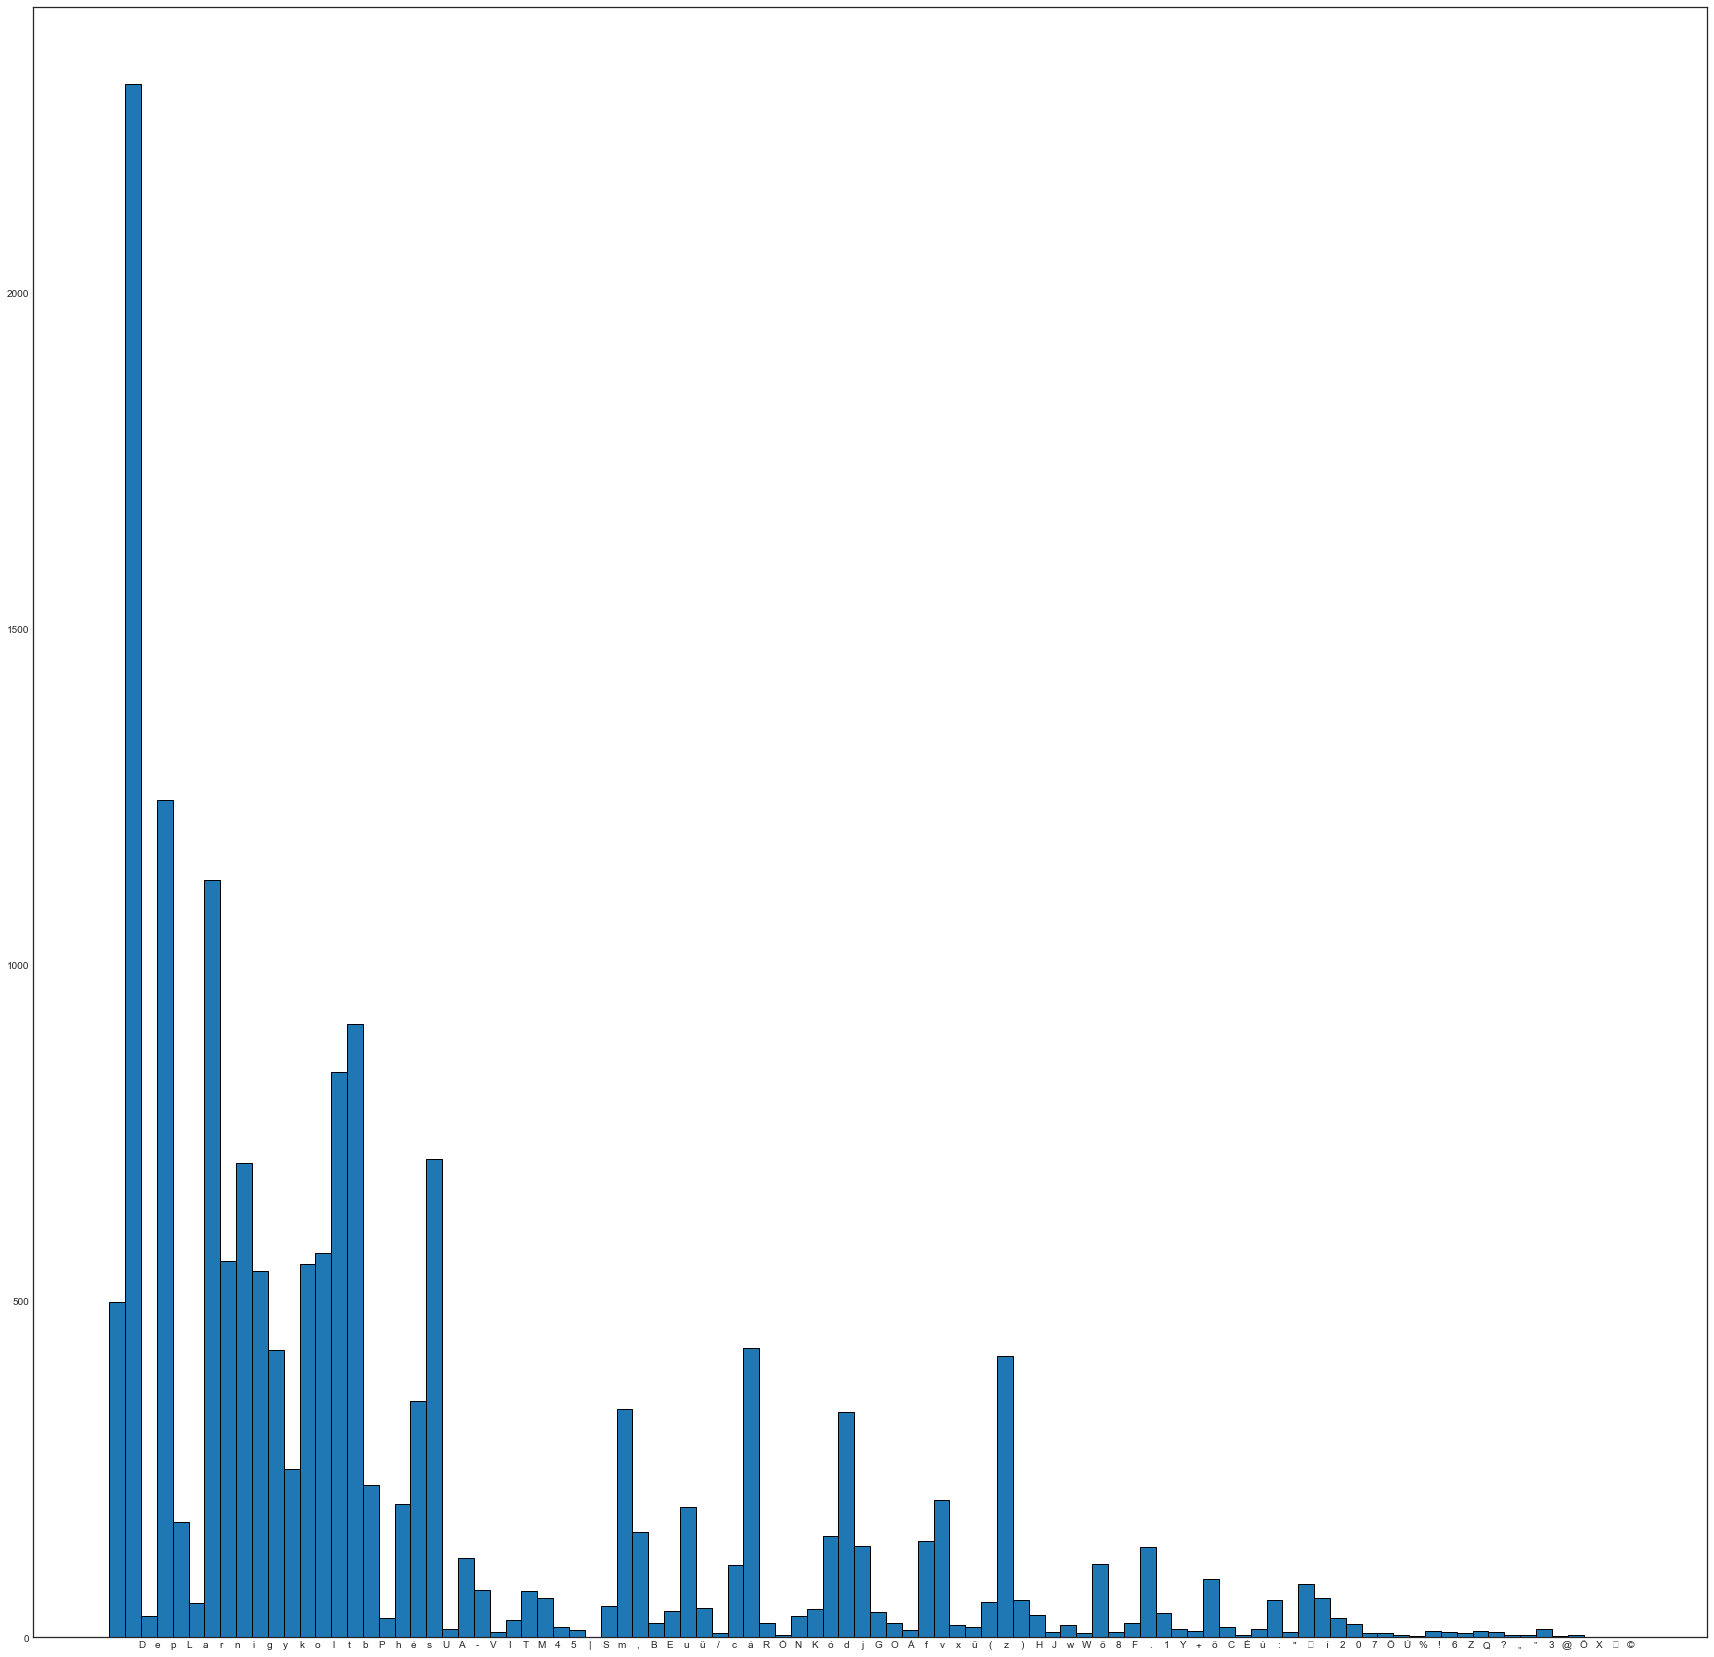

In [433]:
task_05()